In [53]:
import MLP.MLP_module as mlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

GWdata_testing = pd.read_csv('data_for_MLP/training/_O4_MLP_data_HLV_250000_det_H1_L1_V1_run_O4_approx_IMRPhenomXPHM_batch_1.csv').head(50000)

testing_snrsdl = (GWdata_testing[['snr_H1', 'snr_L1', 'snr_V1']] *  GWdata_testing[['luminosity_distance']].values).squeeze()

testing_data = GWdata_testing[[ 'mass_1', 'mass_2', 'a_1', 'a_2', 'tilt_1', 'tilt_2',
                             'ra', 'dec', 'theta_jn', 'phi_jl', 'phi_12','psi','geocent_time']]
testing_data.loc[:, 'geocent_time'] = testing_data['geocent_time'] % 86164.1
testing_data = testing_data.values

In [49]:
GWdata_testing

,Unnamed: 0,luminosity_distance,mass_1,mass_2,a_1,a_2,tilt_1,tilt_2,ra,dec,theta_jn,phi_jl,phi_12,psi,geocent_time,snr_H1,snr_L1,snr_V1
0,0,38.237180,155.497650,2.348637,0.727256,0.659425,1.356964,1.716569,4.837990,-1.000118,0.469625,1.867799,6.200351,1.438864,1.176061e+09,85.648844,85.897239,66.346055
1,1,779.968504,35.760406,4.417017,0.461449,0.816565,1.907431,2.140129,2.288723,-0.217873,0.860534,2.721722,4.361230,0.379393,1.189860e+09,4.143509,7.510197,0.969757
2,2,214.438097,92.935390,2.739952,0.964359,0.770324,2.181007,1.720965,5.559205,-0.759690,0.836683,4.064711,6.046804,0.922786,1.115758e+09,11.225464,12.839940,7.250295
3,3,2446.717632,84.782034,2.517900,0.700390,0.174426,0.360317,1.400745,5.690504,-0.043290,2.620604,4.446859,4.722165,2.644302,1.158424e+09,3.374774,4.022436,1.525841
4,4,2356.203069,349.403531,13.012945,0.663351,0.479972,1.783236,2.530855,2.979577,-0.600495,2.979763,5.742525,0.900988,2.117749,1.246223e+09,0.617062,0.808928,0.248374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,3611.288026,191.927613,6.841564,0.385152,0.453901,1.499359,2.426962,0.876143,0.713148,1.581020,5.045112,1.440926,1.029117,1.141991e+09,0.376891,0.586429,0.645319
9996,9996,743.657089,230.843629,6.452527,0.985381,0.331153,1.674980,1.324481,0.152656,-0.218189,1.702460,3.668889,4.868330,2.685415,1.149626e+09,1.792942,3.027954,2.479078
9997,9997,27.907342,323.934278,8.949733,0.204862,0.461570,2.997853,1.378838,1.798361,-0.167365,2.055373,2.391701,1.468086,0.620596,1.259247e+09,106.435581,93.049878,79.464772
9998,9998,1399.801649,192.048274,9.484131,0.710044,0.143694,1.891603,0.412831,3.918330,-1.545857,1.087690,1.038506,2.829400,1.589459,1.164008e+09,4.460392,3.395549,2.562590


In [54]:
snrs = mlp.load_and_predict(testing_data, model_dir='models/MLP_models/O4_SNR_approx_HLV', device='cuda:0')

snrs_pred = snrs/GWdata_testing[['luminosity_distance']].values
snr_H1 = snrs_pred[:,0]
snr_L1 = snrs_pred[:,1]
snr_V1 = snrs_pred[:,2]

true_H1 = (GWdata_testing[['snr_H1']].values)[:,0]
true_L1 = (GWdata_testing[['snr_L1']].values)[:,0]
true_V1 = (GWdata_testing[['snr_V1']].values)[:,0]

/tmp/ipykernel_2798314/1099448931.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 0.95])


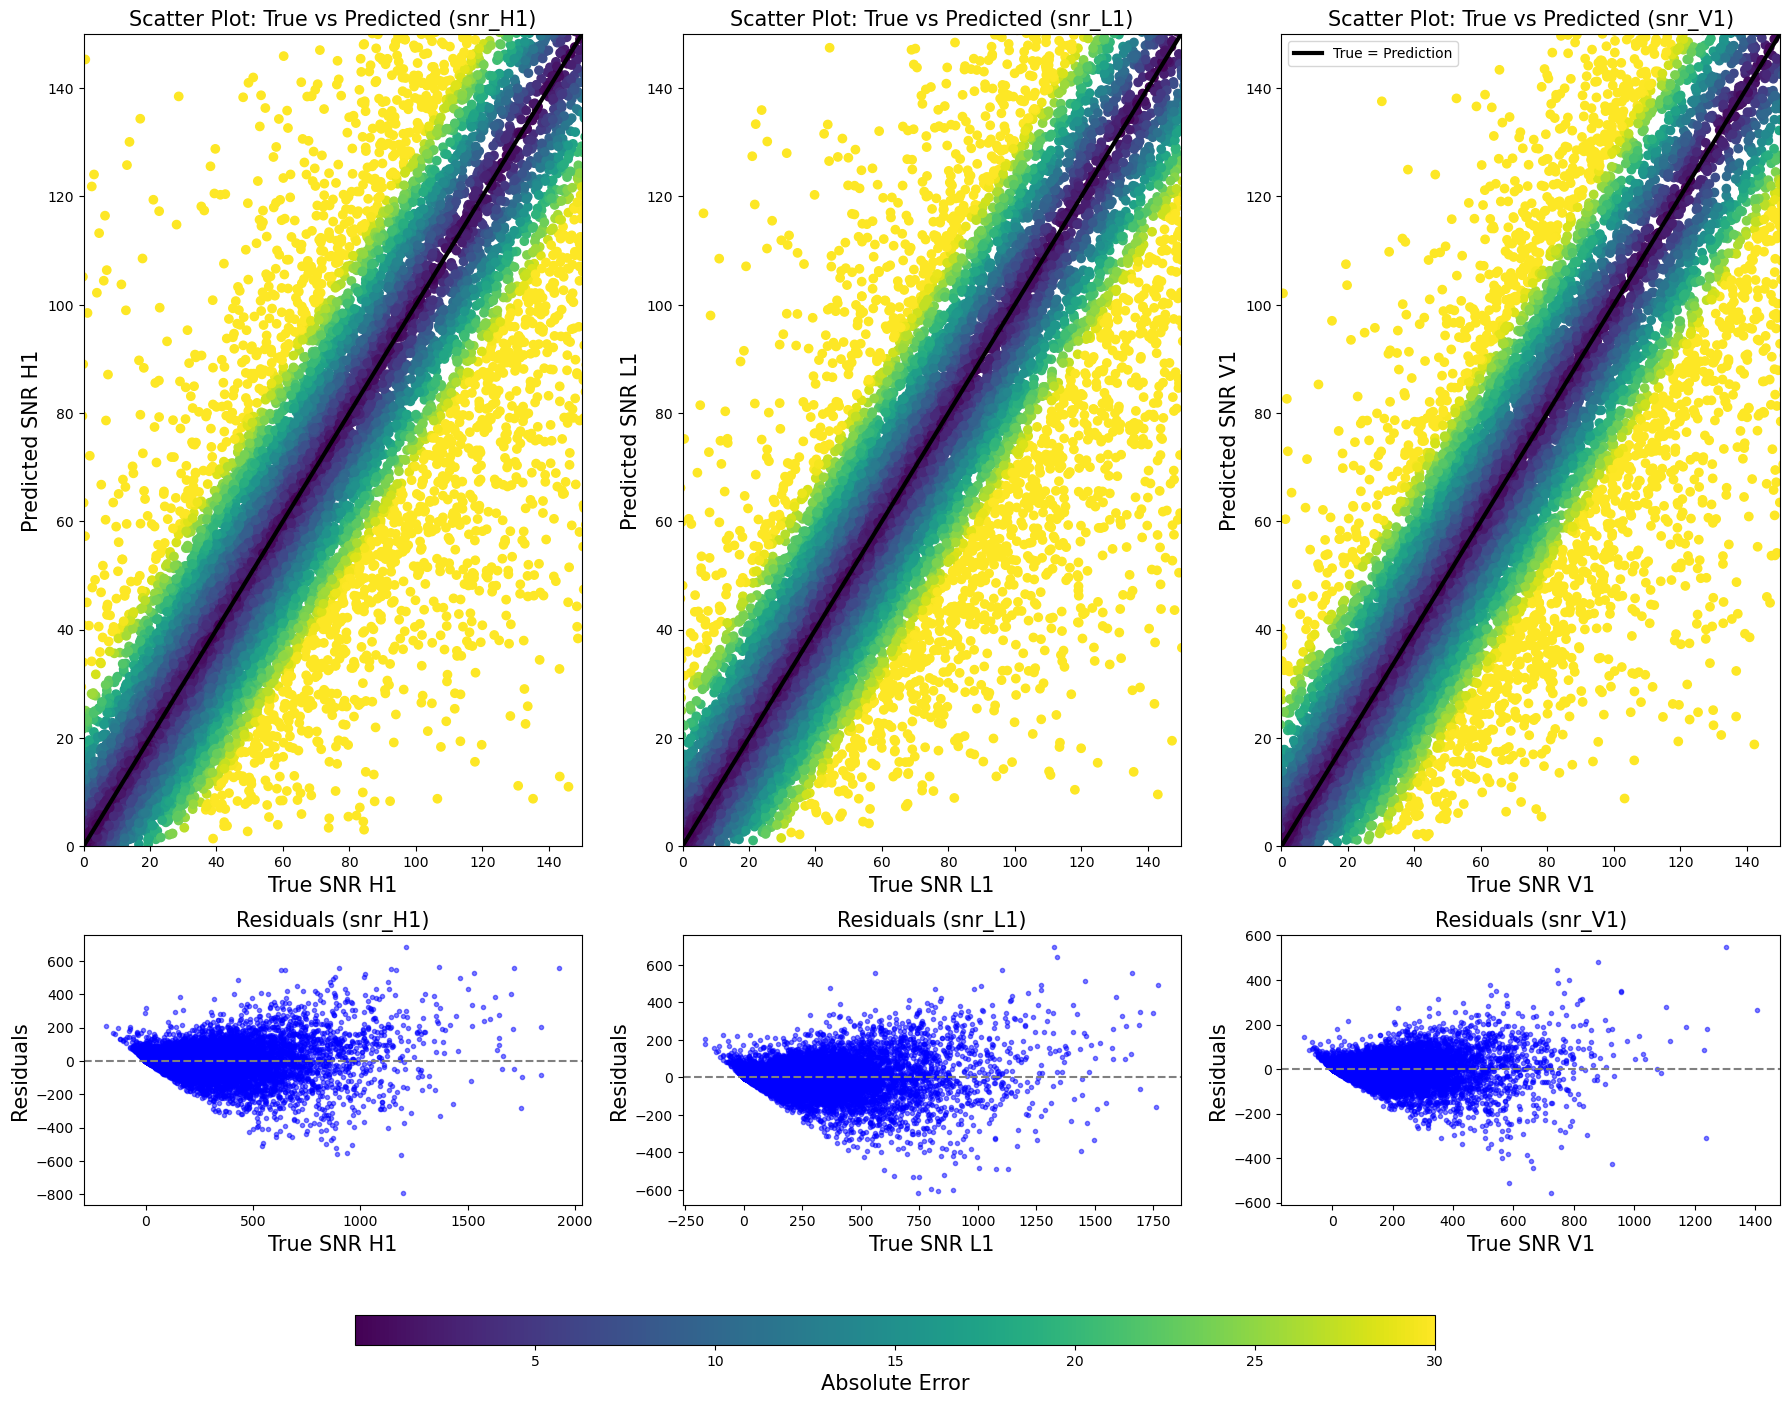

In [55]:
# Create horizontal subplots for scatter plots of predicted vs true SNR values with residuals below
fig, axes = plt.subplots(2, 3, figsize=(18, 15), gridspec_kw={'height_ratios': [3, 1]})

# True vs Predicted SNR H1
sc1 = axes[0, 0].scatter(x=snr_H1, y=true_H1, c=np.abs(snr_H1 - true_H1), cmap='viridis', vmax=30)
axes[0, 0].set_title('Scatter Plot: True vs Predicted (snr_H1)', fontsize=15)
axes[0, 0].set_xlabel('True SNR H1', fontsize=15)
axes[0, 0].set_ylabel('Predicted SNR H1', fontsize=15)
axes[0, 0].set_ylim([0, 150])
axes[0, 0].set_xlim([0, 150])
axes[0, 0].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3)

# Residuals for SNR H1
residuals_H1 = true_H1 - snr_H1
axes[1, 0].plot(snr_H1, residuals_H1, 'b.', alpha=0.5)
axes[1, 0].axhline(0, color='gray', linestyle='--')
axes[1, 0].set_xlabel('True SNR H1', fontsize=15)
axes[1, 0].set_ylabel('Residuals', fontsize=15)
axes[1, 0].set_title('Residuals (snr_H1)', fontsize=15)

# True vs Predicted SNR L1
sc2 = axes[0, 1].scatter(x=snr_L1, y=true_L1, c=np.abs(snr_L1 - true_L1), cmap='viridis', vmax=30)
axes[0, 1].set_title('Scatter Plot: True vs Predicted (snr_L1)', fontsize=15)
axes[0, 1].set_xlabel('True SNR L1', fontsize=15)
axes[0, 1].set_ylabel('Predicted SNR L1', fontsize=15)
axes[0, 1].set_ylim([0, 150])
axes[0, 1].set_xlim([0, 150])
axes[0, 1].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3)

# Residuals for SNR L1
residuals_L1 = true_L1 - snr_L1
axes[1, 1].plot(snr_L1, residuals_L1, 'b.', alpha=0.5)
axes[1, 1].axhline(0, color='gray', linestyle='--')
axes[1, 1].set_xlabel('True SNR L1', fontsize=15)
axes[1, 1].set_ylabel('Residuals', fontsize=15)
axes[1, 1].set_title('Residuals (snr_L1)', fontsize=15)

# True vs Predicted SNR V1
sc3 = axes[0, 2].scatter(x=snr_V1, y=true_V1, c=np.abs(snr_V1 - true_V1), cmap='viridis', vmax=30)
axes[0, 2].set_title('Scatter Plot: True vs Predicted (snr_V1)', fontsize=15)
axes[0, 2].set_xlabel('True SNR V1', fontsize=15)
axes[0, 2].set_ylabel('Predicted SNR V1', fontsize=15)
axes[0, 2].set_ylim([0, 150])
axes[0, 2].set_xlim([0, 150])
axes[0, 2].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3, label='True = Prediction')
axes[0, 2].legend()

# Residuals for SNR V1
residuals_V1 = true_V1 - snr_V1
axes[1, 2].plot(snr_V1, residuals_V1, 'b.', alpha=0.5)
axes[1, 2].axhline(0, color='gray', linestyle='--')
axes[1, 2].set_xlabel('True SNR V1', fontsize=15)
axes[1, 2].set_ylabel('Residuals', fontsize=15)
axes[1, 2].set_title('Residuals (snr_V1)', fontsize=15)

# Add a separate axis for the colorbar below the residuals
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sc3, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Absolute Error', fontsize=15)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig('models/MLP_models/O4_SNR_approx_HLV/true_vs_pred.png', dpi = 300)
plt.show()


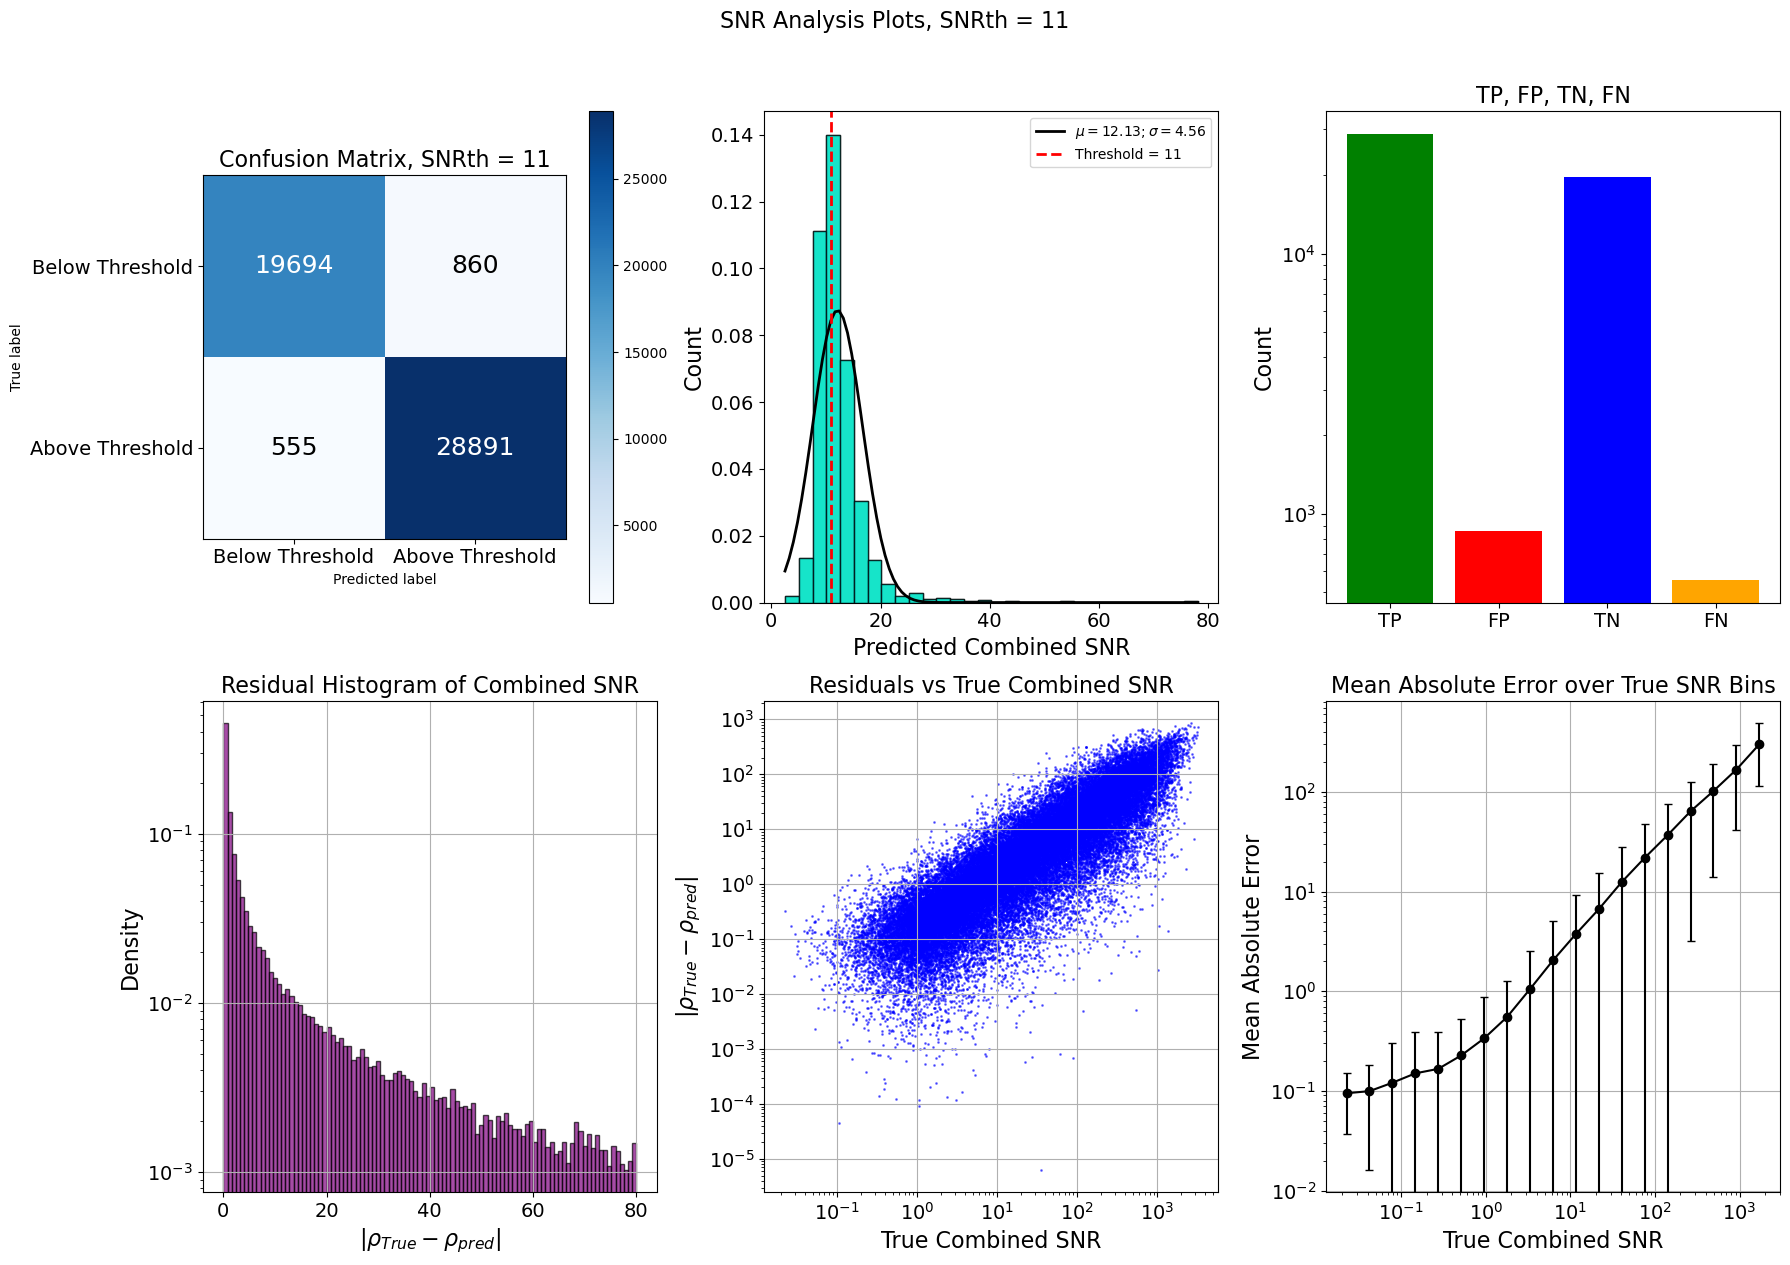

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Set the threshold value
threshold = 11  # SNR threshold value for classification

# Calculate combined SNR for true and predicted values
snr_combined_pred = np.sqrt(snr_H1**2 + snr_L1**2 + snr_V1**2)
snr_combined_true = np.sqrt(true_H1**2 + true_L1**2 + true_V1**2)

# Calculate residuals
residuals = snr_combined_true - snr_combined_pred

# Generate True and Predicted Labels Based on Threshold
true_labels_combined = (snr_combined_true > threshold).astype(int)  # 1 if above threshold, 0 otherwise
pred_labels_combined = (snr_combined_pred > threshold).astype(int) 

# Create a figure with five subplots: three in the first row, and two in the second row
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the ax array for easier indexing
ax = ax.flatten()

# Confusion Matrix Heatmap
cm = confusion_matrix(true_labels_combined, pred_labels_combined)
im = ax[0].imshow(cm, cmap='Blues', interpolation='nearest')
ax[0].figure.colorbar(im, ax=ax[0])
ax[0].set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          xticklabels=['Below Threshold', 'Above Threshold'],
          yticklabels=['Below Threshold', 'Above Threshold'],
          ylabel='True label',
          xlabel='Predicted label')
ax[0].set_title('Confusion Matrix, SNRth = {}'.format(threshold), fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax[0].text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                   color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=18)

# New Histogram for True Events within Threshold +- 0.1
mask = (snr_combined_true > (threshold - 1)) & (snr_combined_true < (threshold + 1))
predicted_snr_values = snr_combined_pred[mask]

# Plot the histogram
n, bins, patches = ax[1].hist(predicted_snr_values, bins=30, alpha=0.7, color='green', edgecolor='black', density=True)

# Fit a Gaussian to the histogram data
(mu, sigma) = norm.fit(predicted_snr_values)
x = np.linspace(min(bins), max(bins), 100)
y = norm.pdf(x, mu, sigma)
ax[1].plot(x, y, 'k', linewidth=2, label=f'$\mu={mu:.2f}; \sigma={sigma:.2f}$')

ax[1].hist(snr_combined_pred[mask], bins=30, alpha=0.7, color='cyan', edgecolor='black', density = 1)
ax[1].set_xlabel('Predicted Combined SNR', fontsize=16)
ax[1].set_ylabel('Count', fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].axvline(threshold, color='red', linestyle='--', linewidth=2, label='Threshold = {}'.format(threshold))
ax[1].legend()

# True Positives, False Positives, True Negatives, and False Negatives Plot
true_positives = cm[1, 1]
false_positives = cm[0, 1]
true_negatives = cm[0, 0]
false_negatives = cm[1, 0]
ax[2].bar(['TP', 'FP', 'TN', 'FN'],
          [true_positives, false_positives, true_negatives, false_negatives],
          color=['green', 'red', 'blue', 'orange'])
ax[2].set_title('TP, FP, TN, FN', fontsize=16)
ax[2].set_ylabel('Count', fontsize=16)
ax[2].set_yscale('log')
ax[2].tick_params(axis='both', which='major', labelsize=14)

# Residual Histogram (below)
ax[3].hist(abs(residuals), bins=100, color='purple', edgecolor='black', alpha=0.7, range=(0, 80), density=1)
ax[3].set_title('Residual Histogram of Combined SNR', fontsize=16)
ax[3].set_xlabel(r'$|\rho_{True} - \rho_{pred}|$', fontsize=16)
ax[3].set_ylabel('Density', fontsize=16)
ax[3].set_yscale('log')
ax[3].tick_params(axis='both', which='major', labelsize=14)
ax[3].grid(True)

# Scatter Plot of Residuals Against True SNR (below)
ax[4].scatter(snr_combined_true, abs(residuals), color='blue', alpha=0.5, s = 1)
ax[4].set_title('Residuals vs True Combined SNR', fontsize=16)
ax[4].set_xlabel('True Combined SNR', fontsize=16)
ax[4].set_ylabel(r'$|\rho_{True} - \rho_{pred}|$', fontsize=16)
ax[4].set_xscale('log')
ax[4].set_yscale('log')
ax[4].tick_params(axis='both', which='major', labelsize=14)
ax[4].grid(True)

# Sixth Plot: Mean Absolute Error (MAE) over Bins of True SNR with Error Bars
bin_edges = np.logspace(np.log10(min(snr_combined_true)), np.log10(max(snr_combined_true)), 20)  # Logarithmically spaced bins
bin_indices = np.digitize(snr_combined_true, bins=bin_edges)
mae_per_bin = []
std_per_bin = []

for i in range(1, len(bin_edges)):
    bin_mask = (bin_indices == i)
    if np.sum(bin_mask) > 0:
        mae = np.mean(abs(residuals[bin_mask]))
        std = np.std(abs(residuals[bin_mask]))
        mae_per_bin.append(mae)
        std_per_bin.append(std)
    else:
        mae_per_bin.append(np.nan)
        std_per_bin.append(np.nan)

# Plotting MAE over Bins with Error Bars
ax[5].errorbar(bin_edges[:-1], mae_per_bin, yerr=std_per_bin, fmt='o-', color='black', ecolor='black', capsize=3)
ax[5].set_yscale('log')
ax[5].set_xscale('log')
ax[5].set_title('Mean Absolute Error over True SNR Bins', fontsize=16)
ax[5].set_xlabel('True Combined SNR', fontsize=16)
ax[5].set_ylabel('Mean Absolute Error', fontsize=16)
ax[5].tick_params(axis='both', which='major', labelsize=14)
ax[5].grid(True)



# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.tight_layout()
plt.suptitle('SNR Analysis Plots, SNRth = {}'.format(threshold), fontsize=16, y=1.05)
plt.savefig('models/MLP_models/O4_SNR_approx_HLV/confusion_and_statistics.png', dpi = 300)
# Display the figure
plt.show()
